In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Missing Values

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/CS_7267_Machine_Learning_LAB/loan.csv")

In [ ]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
# The shape of a dataset refers to its dimensions, specifically: (number of rows, number of columns)
# Rows represent the number of samples/observations.
# Columns represent the number of features/attributes/variables.

dataset.shape

(614, 13)

In [ ]:
# The .info() method in pandas is used to get a summary of a DataFrame, including:

# The number of non-null entries in each column, # Data types of each column,
# Memory usage, Index details, Number of columns and rows.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Find the total null values for each col in dataset
dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# Percentage of missing data

(dataset.isnull().sum()/dataset.shape[0])*100

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


In [ ]:
dataset.isnull().sum().sum()

np.int64(149)

In [ ]:
(dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1]))*100

np.float64(1.8667000751691305)

In [ ]:
dataset.notnull().sum().sum()

np.int64(7833)

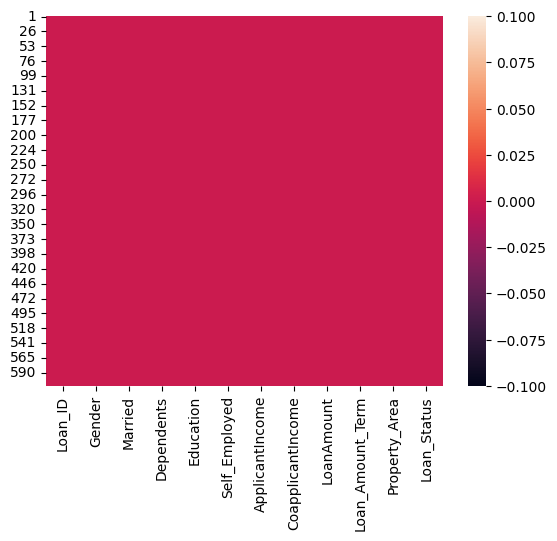

In [ ]:
sns.heatmap(dataset.isnull())
plt.show()

In [ ]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
dataset.drop(columns=["Credit_History"], inplace=True)

In [ ]:
dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
dataset.shape

(614, 12)

In [ ]:
dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
dataset.shape

(523, 12)

In [ ]:
((618-523)/618)*100

15.372168284789645

# Handling Missing Values - Categorical Data - Imputation

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CS_7267_Machine_Learning_LAB/loan.csv")

In [ ]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# df.fillna(method="bfill")

/tmp/ipython-input-3896554658.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill")


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df["Gender"].mode()[0]

'Male'

In [ ]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)

/tmp/ipython-input-2063836454.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)


In [ ]:
df.select_dtypes(include="object").isnull().sum()

,0
Loan_ID,0
Gender,0
Married,3
Dependents,15
Education,0
Self_Employed,32
Property_Area,0
Loan_Status,0


In [ ]:
for i in df.select_dtypes(include="object").columns:
    print(i)
    df[i].fillna(df[i].mode()[0], inplace=True)

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status


/tmp/ipython-input-481306712.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CS_7267_Machine_Learning_LAB/loan.csv")

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df.select_dtypes(include="float64").columns

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
si = SimpleImputer(strategy="mean")
ar = si.fit_transform(df[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History']])

In [ ]:
new_df = pd.DataFrame(ar, columns=df.select_dtypes(include="float64").columns)

In [ ]:
new_df.isnull().sum()

,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
new_df.head()

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,146.412162,360.0,1.0
1,1508.0,128.000000,360.0,1.0
2,0.0,66.000000,360.0,1.0
3,2358.0,120.000000,360.0,1.0
4,0.0,141.000000,360.0,1.0


## One Hot Encoding

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CS_7267_Machine_Learning_LAB/loan.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)

/tmp/ipython-input-2063836454.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df["Married"].fillna(df["Married"].mode()[0], inplace=True)

/tmp/ipython-input-1979151548.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Married"].fillna(df["Married"].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
en_data = df[["Gender", "Married"]]
en_data

,Gender,Married
0,Male,No
1,Male,Yes
2,Male,Yes
3,Male,Yes
4,Male,No
...,...,...
609,Female,No
610,Male,Yes
611,Male,Yes
612,Male,Yes


In [ ]:
pd.get_dummies(en_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gender_Female  614 non-null    bool 
 1   Gender_Male    614 non-null    bool 
 2   Married_No     614 non-null    bool 
 3   Married_Yes    614 non-null    bool 
dtypes: bool(4)
memory usage: 2.5 KB


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(drop="first")
ar = ohe.fit_transform(en_data).toarray()
ar

array([[1., 0.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [0., 0.]])

In [ ]:
pd.DataFrame(ar, columns=["Gender_Male", "Married_Yes"])

,Gender_Male,Married_Yes
0,1.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,0.0
...,...,...
609,0.0,0.0
610,1.0,1.0
611,1.0,1.0
612,1.0,1.0


## LABEL ENCODING

In [ ]:
df = pd.DataFrame({"name":["wscube", "cow", "cat", "dog", "black"]})
df

,name
0,wscube
1,cow
2,cat
3,dog
4,black


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df["en_name"] = le.fit_transform(df["name"])


In [ ]:
df

,name,en_name
0,wscube,4
1,cow,2
2,cat,1
3,dog,3
4,black,0


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CS_7267_Machine_Learning_LAB/loan.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
la = LabelEncoder()
la.fit(df["Property_Area"])

LabelEncoder()

In [ ]:
df["Property_Area"] = la.transform(df["Property_Area"])

In [ ]:
df["Property_Area"].unique()

array([2, 0, 1])

## Ordinal Encoding

In [ ]:
df = pd.DataFrame({"Size":["s", "m", "l", "xl", "s", "m", "l", "xl", "s", "m", "l", "xl", "m"]})
df

,Size
0,s
1,m
2,l
3,xl
4,s
5,m
6,l
7,xl
8,s
9,m


In [ ]:
ord_data = [["s", "m", "l", "xl"]]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe = OrdinalEncoder(categories=ord_data)
oe.fit(df[["Size"]])

OrdinalEncoder(categories=[['s', 'm', 'l', 'xl']])

In [ ]:
df["Size_en"] = oe.transform(df[["Size"]])
df

,Size,Size_en
0,s,0.0
1,m,1.0
2,l,2.0
3,xl,3.0
4,s,0.0
5,m,1.0
6,l,2.0
7,xl,3.0
8,s,0.0
9,m,1.0


In [ ]:
ord_data1 = {"s":0, "m":1, "l":2, "xl":3}

In [ ]:
df["Size_en_map"] = df["Size"].map(ord_data1)

In [ ]:
df

,Size,Size_en,Size_en_map
0,s,0.0,0
1,m,1.0,1
2,l,2.0,2
3,xl,3.0,3
4,s,0.0,0
5,m,1.0,1
6,l,2.0,2
7,xl,3.0,3
8,s,0.0,0
9,m,1.0,1


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CS_7267_Machine_Learning_LAB/loan.csv")

In [ ]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
en_data_ord = [["Rural", "Semiurban", "Urban"]]

In [ ]:
oen = OrdinalEncoder(categories=en_data_ord)

In [ ]:
df["Property_Area"] = oen.fit_transform(df[["Property_Area"]])

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2.0,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2.0,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2.0,Y


# OUTLIERS

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CS_7267_Machine_Learning_LAB/loan.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

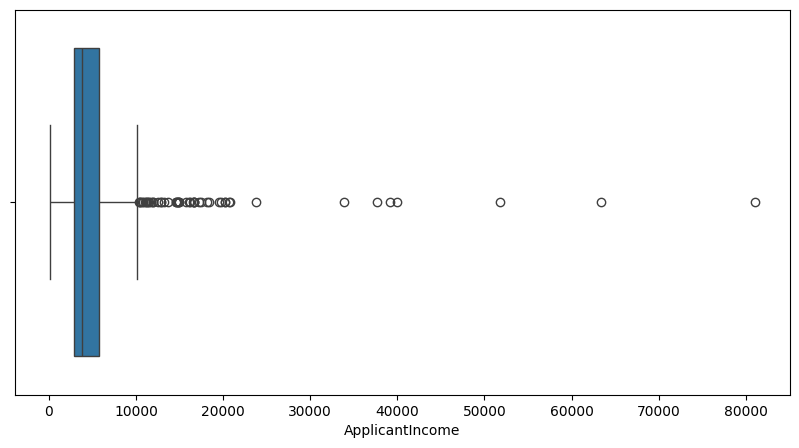

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x = df["ApplicantIncome"], data=df)
plt.show

/tmp/ipython-input-3385199946.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


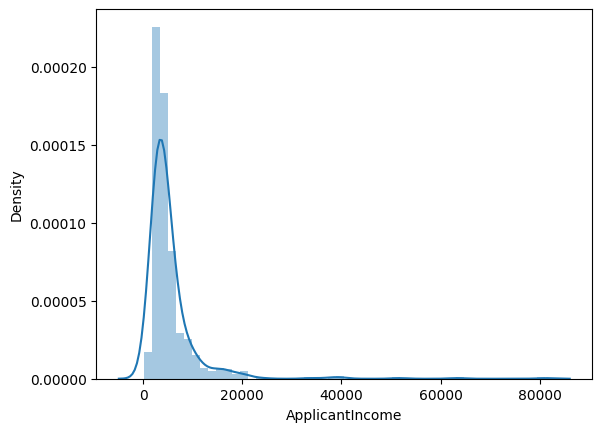

In [ ]:

sns.distplot(df['ApplicantIncome'])
plt.show()

In [ ]:
df.shape

(614, 13)

In [ ]:
q1 = df['CoapplicantIncome'].quantile(0.25)
q3 = df['CoapplicantIncome'].quantile(0.75)

In [ ]:
q1,q3

(np.float64(0.0), np.float64(2297.25))

In [ ]:
IQR = q3-q1
IQR

np.float64(2297.25)

In [ ]:
min_range = q1  - (1.5 * IQR)
max_range = q3  + (1.5 * IQR)

min_range, max_range

(np.float64(-3445.875), np.float64(5743.125))

In [ ]:
new_df = df[df['CoapplicantIncome'] <= max_range]

In [ ]:
new_df.shape

(596, 13)

<function matplotlib.pyplot.show(close=None, block=None)>

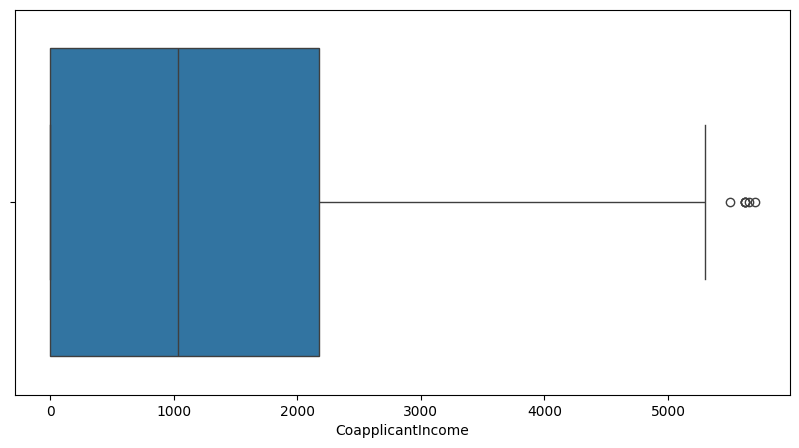

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x = new_df["CoapplicantIncome"], data=new_df)
plt.show

### Outlier Removal using z-score

z = (old_value - mean) / std_dev

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CS_7267_Machine_Learning_LAB/loan.csv")

In [ ]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


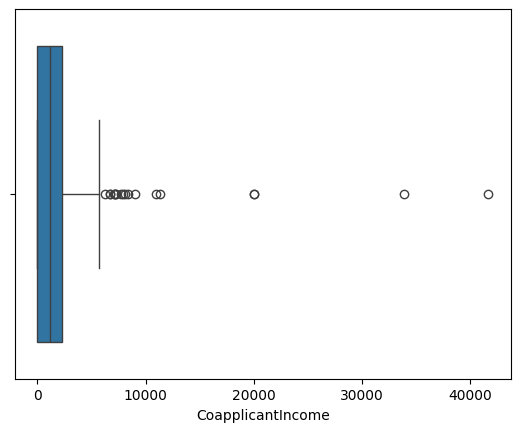

In [ ]:
sns.boxplot(x = df["CoapplicantIncome"], data = df)
plt.show()

/tmp/ipython-input-71723079.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome"])


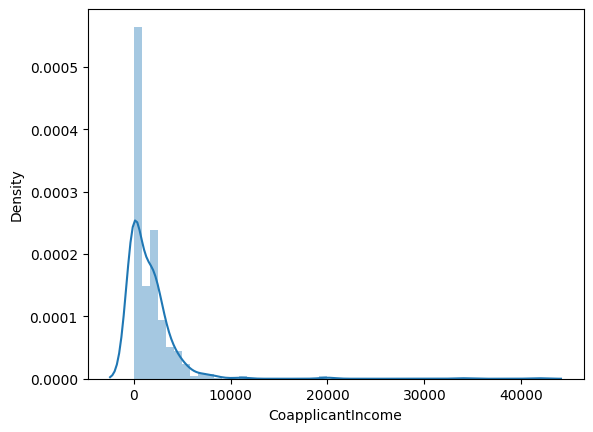

In [ ]:
sns.distplot(df["CoapplicantIncome"])
plt.show()

In [ ]:
min_range = df["CoapplicantIncome"].mean() - (3*df["CoapplicantIncome"].std())
max_range = df["CoapplicantIncome"].mean() + (3*df["CoapplicantIncome"].std())

In [ ]:
min_range, max_range

(np.float64(-7157.499309645475), np.float64(10399.990905699677))

In [ ]:
new_df = df[df["CoapplicantIncome"] <= max_range]

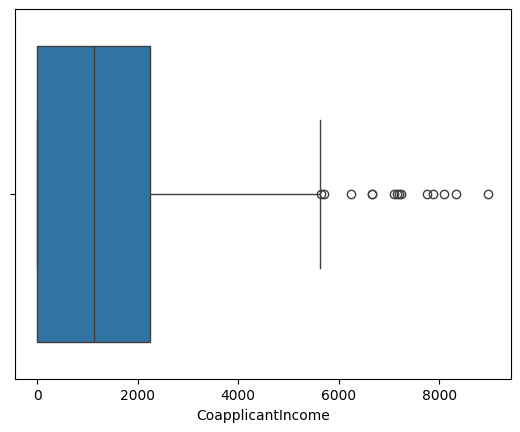

In [ ]:
sns.boxplot(x = "CoapplicantIncome", data=new_df)
plt.show()

In [ ]:
z_score = (df["CoapplicantIncome"] - df["CoapplicantIncome"].mean()) / (df["CoapplicantIncome"].std())

In [ ]:
df["z_score"] = z_score

In [ ]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036


In [ ]:
df[df["z_score"] < 3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,-0.554036


## FEATURE SCALING
    * Standardization - rescales a feature value with mean = 0, and variance = 1
        X_new = (X_i - X_mean) / std_dev

    * Normalization - MinMax Scaling - rescales the values that end up ranging 0 an 1
        X_new = (X_i - min(X)) / (max(x) - min(X))
        

## STANDARDIZATION

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CS_7267_Machine_Learning_LAB/loan.csv")

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# Handling Null Values

df['ApplicantIncome'].fillna(df['ApplicantIncome'].mean(), inplace=True)

/tmp/ipython-input-3495476641.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ApplicantIncome'].fillna(df['ApplicantIncome'].mean(), inplace=True)


/tmp/ipython-input-1856407264.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


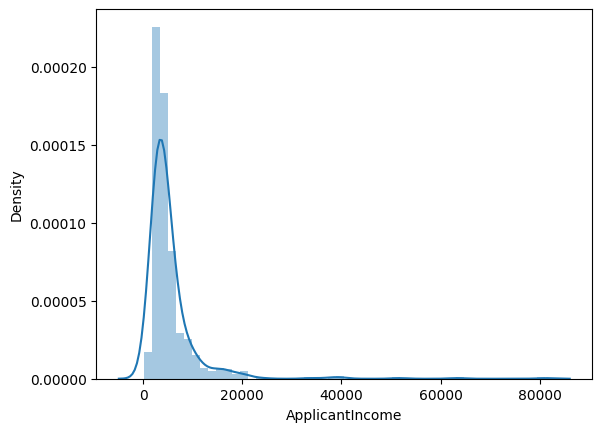

In [ ]:
# Scaling the dataset

sns.distplot(df['ApplicantIncome'])
plt.show()

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
ss.fit(df[["ApplicantIncome"]])

StandardScaler()

In [ ]:
df["ApplicationIncome_ss"] = pd.DataFrame(ss.transform(df[["ApplicantIncome"]]),columns=["x"])

In [ ]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicationIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicationIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


/tmp/ipython-input-2373362439.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ApplicationIncome_ss"])
/tmp/ipython-input-2373362439.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ApplicantIncome"])


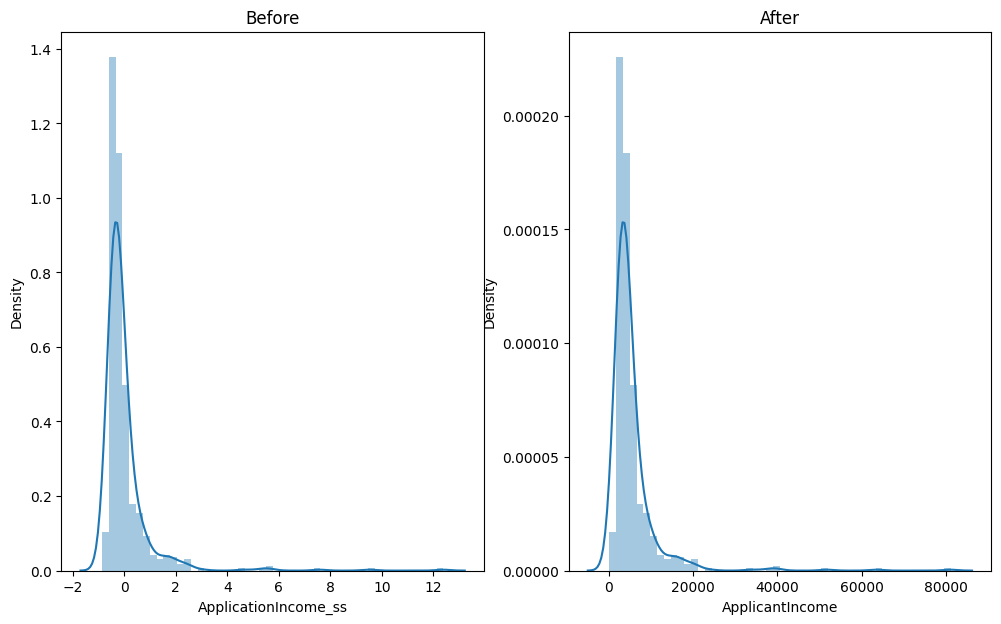

In [ ]:
plt.figure(figsize=(12, 7))

plt.subplot(1, 2, 1)
plt.title("Before")
sns.distplot(df["ApplicationIncome_ss"])

plt.subplot(1, 2, 2)
plt.title("After")
sns.distplot(df["ApplicantIncome"])
plt.show()

# NORMALIZATION

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CS_7267_Machine_Learning_LAB/loan.csv")

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


/tmp/ipython-input-1484241554.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome"])


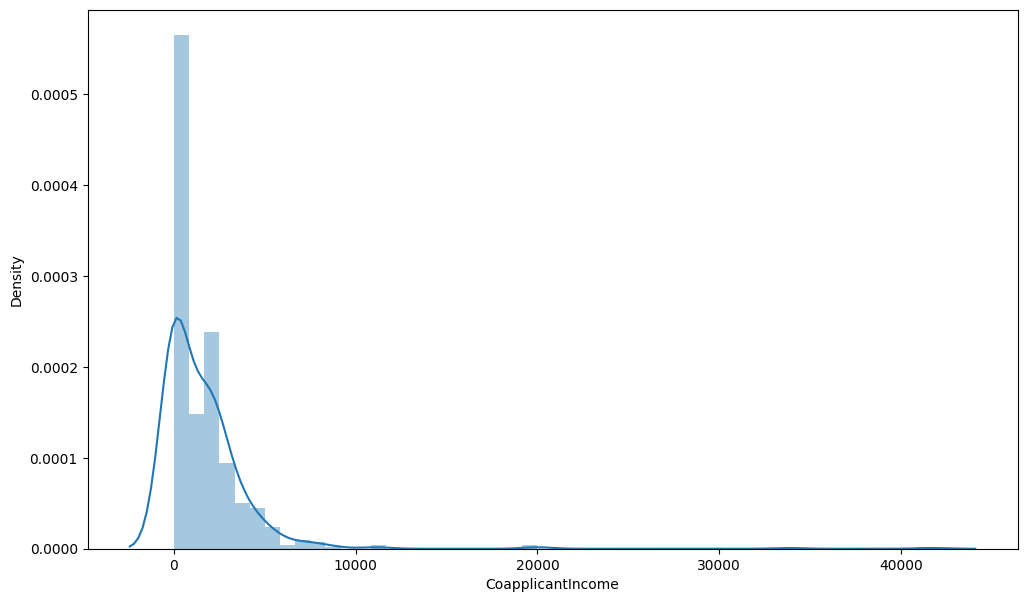

In [ ]:
plt.figure(figsize=(12, 7))

sns.distplot(df["CoapplicantIncome"])
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ms = MinMaxScaler()
ms.fit(df[["CoapplicantIncome"]])

MinMaxScaler()

In [ ]:
df['CoapplicantIncome_min'] = ms.transform(df[["CoapplicantIncome"]])

In [ ]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_min
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.000000


/tmp/ipython-input-2829315209.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome"])
/tmp/ipython-input-2829315209.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome_min"])


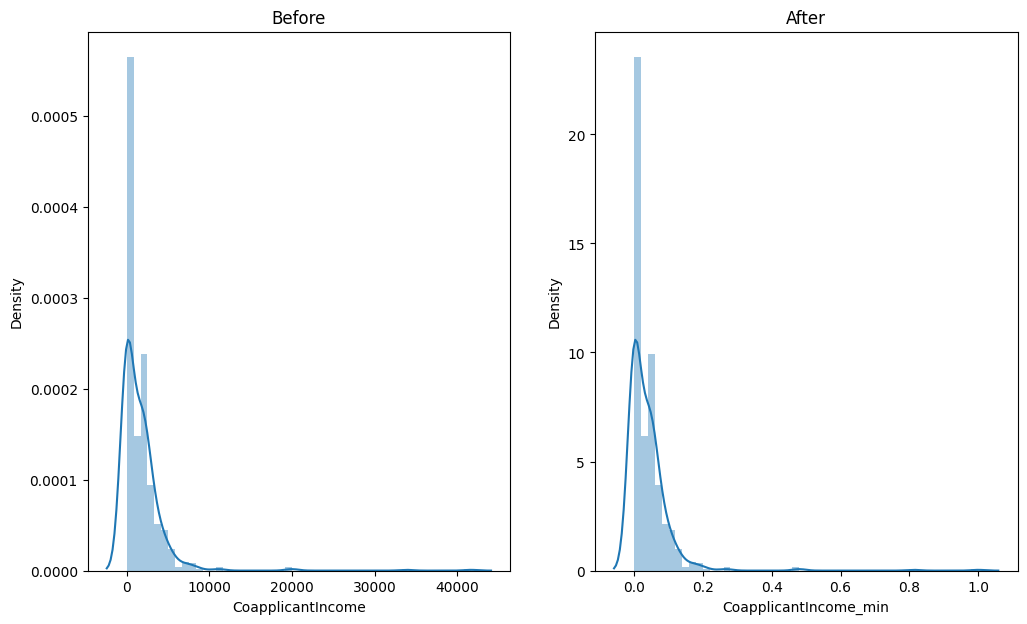

In [ ]:
plt.figure(figsize=(12, 7))

plt.subplot(1, 2, 1)
plt.title("Before")
sns.distplot(df["CoapplicantIncome"])

plt.subplot(1, 2, 2)
plt.title("After")
sns.distplot(df["CoapplicantIncome_min"])
plt.show()

# HANDLING DUPLICATE DATA

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CS_7267_Machine_Learning_LAB/loan.csv")

In [ ]:
data = {"name":['a', 'b', 'c', 'd', 'a', 'c'], "eng":[8, 7, 5, 8, 8, 5], "hindi":[2, 3, 4, 5, 2, 6]}

In [ ]:
df = pd.DataFrame(data)
df

,name,eng,hindi
0,a,8,2
1,b,7,3
2,c,5,4
3,d,8,5
4,a,8,2
5,c,5,6


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df

,name,eng,hindi
0,a,8,2
1,b,7,3
2,c,5,4
3,d,8,5
5,c,5,6


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CS_7267_Machine_Learning_LAB/loan.csv")

In [ ]:
df.shape

(614, 13)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

## Replace Data and Change Data Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df["Dependents"].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [ ]:
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)

/tmp/ipython-input-3260343015.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,0
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df['Dependents'].replace("3+", "3", inplace=True)

In [ ]:
df['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
3,51


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df['Dependents'] = df['Dependents'].astype("int64")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


# FUNCTION TRANSFORMATION

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CS_7267_Machine_Learning_LAB/loan.csv")

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


/tmp/ipython-input-1457747018.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


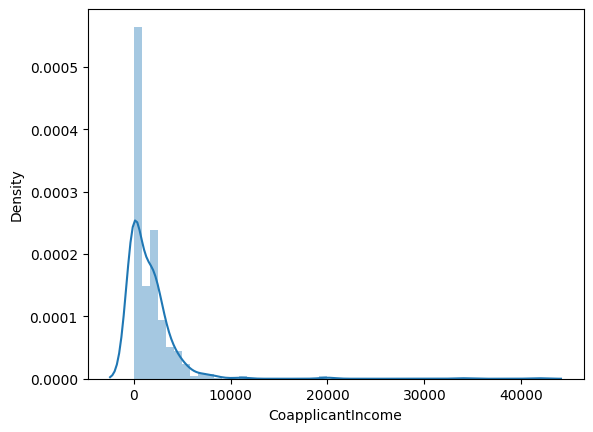

In [ ]:
sns.distplot(df['CoapplicantIncome'])
plt.show()

In [ ]:
q1 = df['CoapplicantIncome'].quantile(0.25)
q3 = df['CoapplicantIncome'].quantile(0.75)
iqr = q3 - q1


In [ ]:
min_range = q1 - (1.5 * iqr)
max_range = q3 + (1.5 * iqr)

min_range, max_range

(np.float64(-3445.875), np.float64(5743.125))

In [ ]:
df = df[df['CoapplicantIncome'] <= max_range]

/tmp/ipython-input-1457747018.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


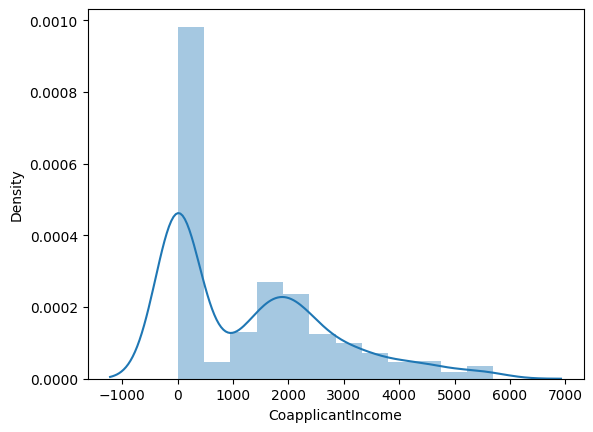

In [ ]:
sns.distplot(df['CoapplicantIncome'])
plt.show()

In [ ]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [ ]:
ft = FunctionTransformer(func=np.log1p)

In [ ]:
ft.fit(df[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [ ]:
 df['CoapplicantIncome_tf'] = ft.transform(df[["CoapplicantIncome"]])

/tmp/ipython-input-170508510.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])
/tmp/ipython-input-170508510.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome_tf'])


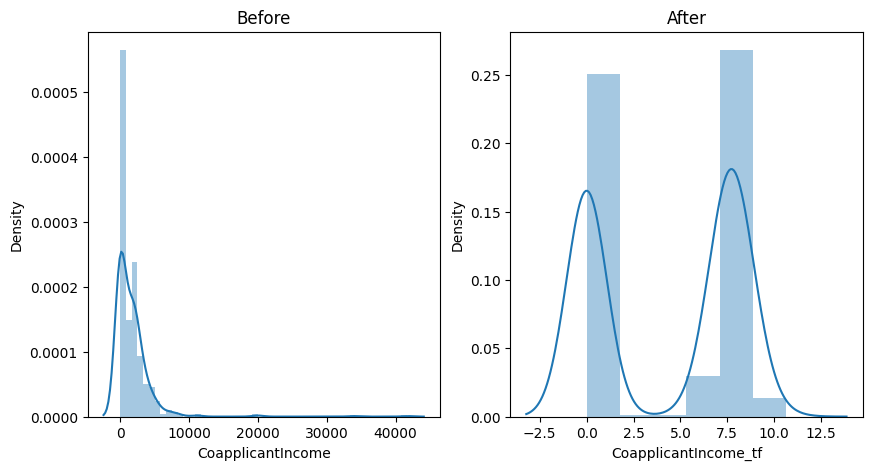

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Before")
sns.distplot(df['CoapplicantIncome'])

plt.subplot(1, 2, 2)
plt.title("After")
sns.distplot(df['CoapplicantIncome_tf'])

plt.show()

# Feature Selection Techniques
* Forward Elimination
* Backward Elimination

In [4]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [8]:
df = pd.read_csv("/content/drive/MyDrive/CS_7267_Machine_Learning_LAB/diabetes.csv")
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,17,163,72,41,114,40.9,0.817,47,1
1,15,136,70,32,110,37.1,0.153,43,1
2,14,100,78,25,184,36.6,0.412,46,1


In [10]:
x = df.iloc[:,:-1]
y = df["Outcome"]

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr = LogisticRegression()

In [13]:
fs = SequentialFeatureSelector(lr, k_features=5, forward=True)

In [14]:
fs.fit(x, y)

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(5, 5),
                          scoring='accuracy')

In [15]:
fs.feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']